# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [136]:
music=pd.read_csv("Music Dataset_clustered.csv")

In [137]:
music.head()

,Song,Artist,Streams,Daily Streams,Genre,Release Year,Peak Position,Weeks on Chart,Lyrics Sentiment,TikTok Virality,Danceability,Acousticness,Energy,Cluster
0,Track 14728,EchoSync,689815326,796199,Trap,2021,81,8.0,0.20,17.0,0.11,0.59,0.60,3
1,Track 21319,The Midnight Howl,457954557,2426710,Electronic,2018,44,99.0,0.51,30.0,0.61,0.25,0.71,3
2,Track 22152,Retro Resonance,217316865,1639915,Reggae,1992,57,12.0,0.36,11.0,0.43,0.58,0.20,3
3,Track 80217,Urban Rhapsody,312747634,3614532,Pop,2000,21,50.0,0.89,44.0,0.18,0.04,0.63,3
4,Track 77204,Sofia Carter,726442597,1028518,Blues,2001,97,9.0,-0.62,71.0,0.82,0.59,0.61,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [140]:
# 3. Data Splitting (Gunakan fitur yang digunakan untuk clustering: Temperature, Humidity, Rainfall)
X_cluster = music[["Weeks on Chart", "Lyrics Sentiment", "TikTok Virality"]]  # Fitur sesuai clustering
y_cluster = music["Cluster"]  # Target (Cluster)

In [141]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42, stratify=y_cluster)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [145]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "GaussianNB": GaussianNB()
}
results=[]

Penggunaan model klasifikasi dengan beberapa model bertujuan untuk membandingkan nilai akurasi yang besar sehingga bisa mendapatkan model yang diinginkan

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Decision Tree Classification Report:
              precision    recall  f1-score     support
0              0.962500  0.978814  0.970588  236.000000
1              0.972000  0.960474  0.966203  253.000000
2              0.991525  0.955102  0.972973  245.000000
3              0.934426  0.966102  0.950000  236.000000
accuracy       0.964948  0.964948  0.964948    0.964948
macro avg      0.965113  0.965123  0.964941  970.000000
weighted avg   0.965479  0.964948  0.965038  970.000000


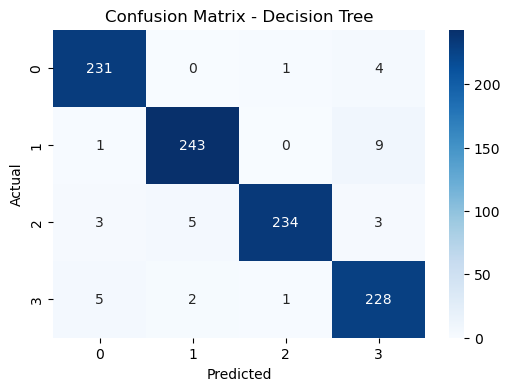


Random Forest Classification Report:
              precision    recall  f1-score     support
0              0.974684  0.978814  0.976744  236.000000
1              0.964567  0.968379  0.966469  253.000000
2              0.987448  0.963265  0.975207  245.000000
3              0.950000  0.966102  0.957983  236.000000
accuracy       0.969072  0.969072  0.969072    0.969072
macro avg      0.969175  0.969140  0.969101  970.000000
weighted avg   0.969263  0.969072  0.969111  970.000000


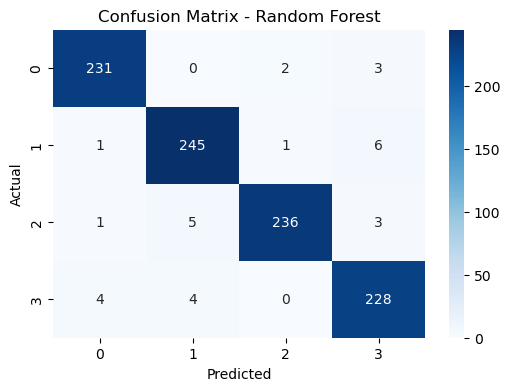


KNN Classification Report:
              precision    recall  f1-score     support
0              0.618852  0.639831  0.629167  236.000000
1              0.711382  0.691700  0.701403  253.000000
2              0.680162  0.685714  0.682927  245.000000
3              0.639485  0.631356  0.635394  236.000000
accuracy       0.662887  0.662887  0.662887    0.662887
macro avg      0.662470  0.662150  0.662223  970.000000
weighted avg   0.663492  0.662887  0.663101  970.000000


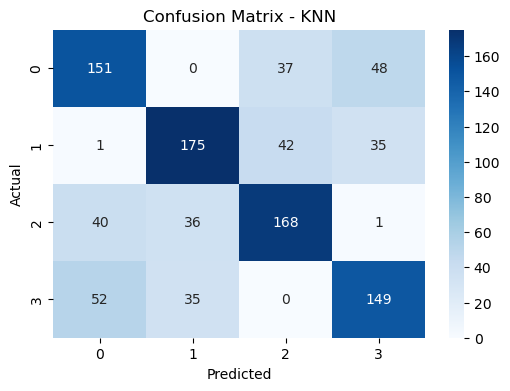


SVC Classification Report:
              precision    recall  f1-score     support
0              0.645161  0.593220  0.618102  236.000000
1              0.635338  0.667984  0.651252  253.000000
2              0.626984  0.644898  0.635815  245.000000
3              0.634043  0.631356  0.632696  236.000000
accuracy       0.635052  0.635052  0.635052    0.635052
macro avg      0.635382  0.634365  0.634466  970.000000
weighted avg   0.635303  0.635052  0.634773  970.000000


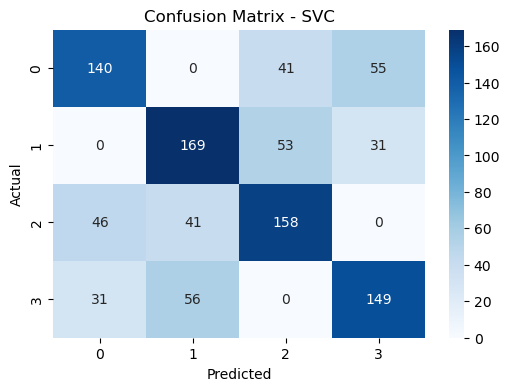


GaussianNB Classification Report:
              precision    recall  f1-score     support
0              0.949580  0.957627  0.953586  236.000000
1              0.960000  0.948617  0.954274  253.000000
2              0.967213  0.963265  0.965235  245.000000
3              0.936975  0.944915  0.940928  236.000000
accuracy       0.953608  0.953608  0.953608    0.953608
macro avg      0.953442  0.953606  0.953506  970.000000
weighted avg   0.953685  0.953608  0.953628  970.000000


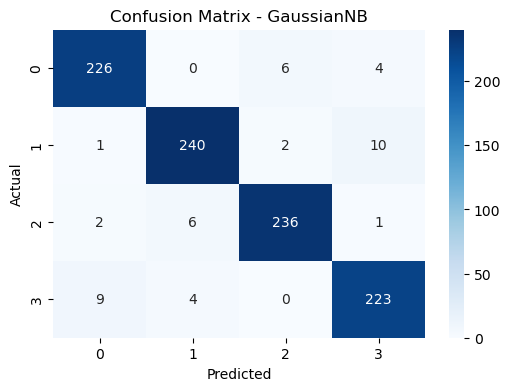

In [149]:
for name, model in models.items():
    model.fit(X_train_c, y_train_c)
    y_pred = model.predict(X_test_c)
    accuracy = accuracy_score(y_test_c, y_pred)
    classification = classification_report(y_test_c, y_pred, output_dict=True)
    cm = confusion_matrix(y_test_c, y_pred)
    results.append([name, accuracy, classification["macro avg"]["precision"], classification["macro avg"]["recall"], classification["macro avg"]["f1-score"]])
    
    print(f"\n{name} Classification Report:")
    print(pd.DataFrame(classification).transpose())
    
    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_cluster), yticklabels=set(y_cluster))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [150]:
comparison_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(comparison_df)

           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.964948   0.965113  0.965123  0.964941
1  Random Forest  0.969072   0.969175  0.969140  0.969101
2            KNN  0.662887   0.662470  0.662150  0.662223
3            SVC  0.635052   0.635382  0.634365  0.634466
4     GaussianNB  0.953608   0.953442  0.953606  0.953506


Berdasarkan data diatas nilai tertinggi menggunakan model random forest dan terendah menggunakan SVC dengan nilai akurasi 0.969072 dan 0.635052. oleh karena itu model yang cocok untuk klasifikasi dataset ini menggunakan random forest.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [154]:
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_c, y_train_c)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


In [155]:
random_grid = {
    "n_estimators": np.arange(50, 200, 10),
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), random_grid, n_iter=10, cv=5, scoring="accuracy", n_jobs=-1, random_state=42)
random_search.fit(X_train_c, y_train_c)

best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

print("Best Parameters (RandomizedSearchCV):", best_params_random)

Best Parameters (RandomizedSearchCV): {'n_estimators': 150, 'min_samples_split': 2, 'max_depth': 30}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [158]:
# 7. Evaluasi Model Klasifikasi setelah Tuning
y_pred_best = best_model.predict(X_test_c)
accuracy_best = accuracy_score(y_test_c, y_pred_best)
classification_best = classification_report(y_test_c, y_pred_best)
cm_best = confusion_matrix(y_test_c, y_pred_best)

In [159]:
print("Accuracy after GridSearchCV tuning:", accuracy_best)
print("Classification Report after GridSearchCV tuning:\n", classification_best)

Accuracy after GridSearchCV tuning: 0.9690721649484536
Classification Report after GridSearchCV tuning:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       236
           1       0.96      0.96      0.96       253
           2       0.99      0.96      0.98       245
           3       0.95      0.97      0.96       236

    accuracy                           0.97       970
   macro avg       0.97      0.97      0.97       970
weighted avg       0.97      0.97      0.97       970



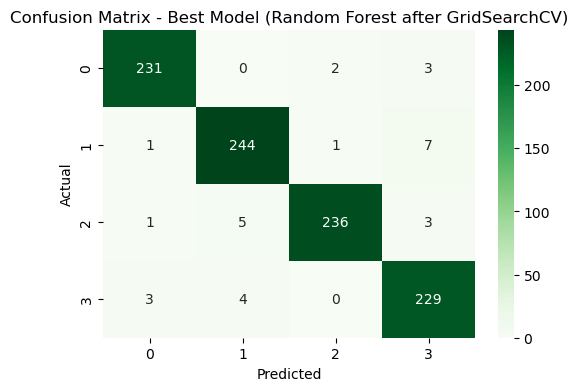

In [160]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens', xticklabels=set(y_cluster), yticklabels=set(y_cluster))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Model (Random Forest after GridSearchCV)")
plt.show()

In [161]:
# Evaluasi RandomizedSearchCV
y_pred_best_random = best_model_random.predict(X_test_c)
accuracy_best_random = accuracy_score(y_test_c, y_pred_best_random)
classification_best_random = classification_report(y_test_c, y_pred_best_random)
cm_best_random = confusion_matrix(y_test_c, y_pred_best_random)

In [162]:
print("Accuracy after RandomizedSearchCV tuning:", accuracy_best_random)
print("Classification Report after RandomizedSearchCV tuning:\n", classification_best_random)

Accuracy after RandomizedSearchCV tuning: 0.9690721649484536
Classification Report after RandomizedSearchCV tuning:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       236
           1       0.96      0.96      0.96       253
           2       0.99      0.96      0.98       245
           3       0.95      0.97      0.96       236

    accuracy                           0.97       970
   macro avg       0.97      0.97      0.97       970
weighted avg       0.97      0.97      0.97       970



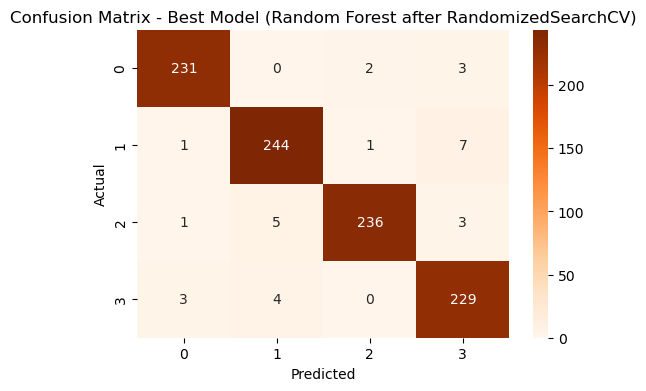

In [163]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_best_random, annot=True, fmt='d', cmap='Oranges', xticklabels=set(y_cluster), yticklabels=set(y_cluster))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Model (Random Forest after RandomizedSearchCV)")
plt.show()

dari hasil evaluasi 2 metode tuning GridSearchCV  dan RandomizedSearchCV yaitu
1. nilai akurasi 2 metode yaitu 0.969072
2. nilai precision, recall, f1-score, support diantara 2 metone tuning memiliki nilai yang sama
3. confusion matrix 2 metode tuning menghasilkan nilai yang sama

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

## Analisis Hasil Evaluasi Model Klasifikasi
1. Perbandingan Evaluasi sebelum dan sesudah tuning menngunakan gridsearchCV dan RandomizedCV.
   
   - sebelum tuning
     
     a. **Accuracy** : 0.9691
     
     b. **Macro Precision** : 0.9692
     
     c. **Macro Recall** : 0.9691
     
     d. **Macro F1** : 0.9691
     
   - Setelah gridsearchCV
     
     a. **Accuracy** : 0.9691
  
     b. **Macro Precision** : 0.97
     
     c. **Macro Recall** : 0.97
  
     d. **Macro F1** : 0.97
  
   - Setelah RandomizedCV
     
     a. **Accuracy** : 0.9691
  
     b. **Macro Precision** : 0.97
  
     c. **Macro Recall** : 0.97
  
     d. **Macro F1** : 0.97
  
    - tuning tidak meningkatkan akurasi secara signifikan, namun memberi konsistensi dan keseimbangan antar metrik pada           semua kelas

3. Identifikasi kelemahan model
   
   a. precision/recall rendah:
      - Tidak ada metrik yang rendah secara kritis (semua di atas 0.95).
      - Kelas dengan precision terendah: kelas 3 (0.95).
      - Kelas dengan recall terendah: kelas 2 (0.96).
   
    b. Overfitting/Underfitting :
      - tidak ada gejala overfitting : performas pada data uji tinggi dan stabil.
      - tidak terjadi underfittingi : model mampu membedakan antar kelas dengan baik

4. Rekomendasi Lanjutan

   - Gunakan model hasil tuning untuk deployment
   - Tambahkan fitur tambahan untuk eksplorasi lebih lanjut
   - Gunakan tools interpretasi seperti SHAP/LIME